# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
pd.options.display.max_rows = 999
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Loading data

In [2]:
data = pd.read_csv('pokemon.csv')
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


## Null Value Analyses

In [3]:
print("% of null values in height_m")
print(len(data[data['height_m'].isnull()].index)/len(data)*100)


% of null values in height_m
2.4968789013732833


In [4]:
print("% of null values in weight_kg")
print(len(data[data['weight_kg'].isnull()].index)/len(data)*100)

% of null values in weight_kg
2.4968789013732833


In [5]:
#dropping records with null values
data.drop(data[data['height_m'].isnull()].index,inplace=True)

In [6]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [7]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male       97
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                383
weight_kg              0
generation             0


In [8]:
#imputing percentage_male with sentinel value of "-1"
data['percentage_male'].fillna(np.int(-1), inplace=True)

In [9]:
data.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m               0
hp                     0
japanese_name          0
name                   0
percentage_male        0
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                383
weight_kg              0
generation             0


In [10]:
#replacing null values in type2 with sentinel value 0
data['type2'].fillna('NA', inplace=True)

# Visualizing Data

Text(0.5, 1.0, 'Pokemon Count vs Pokemon type')

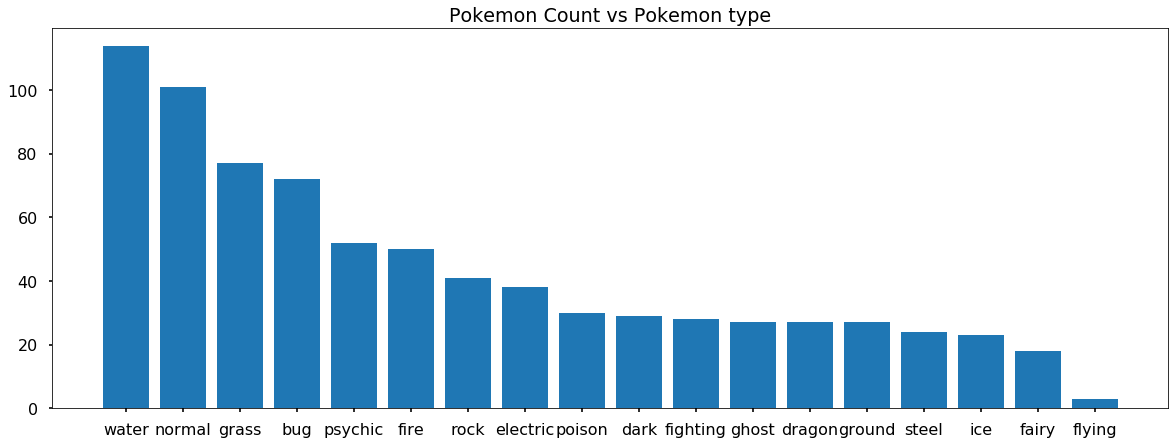

In [11]:
type1 = pd.value_counts(data['type1'])
fig, ax = plt.subplots()
fig.set_size_inches(20, 7)
plt.bar(x=type1.index , height= type1)
plt.title("Pokemon Count vs Pokemon type")

Text(0.5, 1.0, 'Count of pokemon who have multiple types')

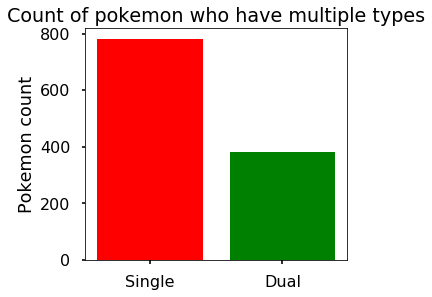

In [12]:
my_colors = 'rg'  
fig, ax = plt.subplots()
fig.set_size_inches(4.7, 4.27)
plt.bar(x=['Single','Dual'] , height=[data['type1'].count(),(data['type2'] == 'NA').sum()],color=my_colors)
plt.ylabel('Pokemon count')
plt.title("Count of pokemon who have multiple types")

In [13]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NA,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NA,19.0,1,0


Text(0.5, 1.0, 'Pokemon speed analyses')

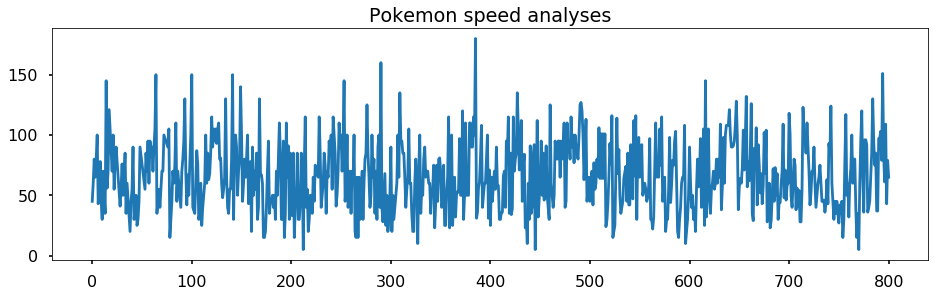

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 4.27)
plt.plot( data['speed'])
plt.title("Pokemon speed analyses")

Text(0.5, 1.0, 'Pokemon weight analyses')

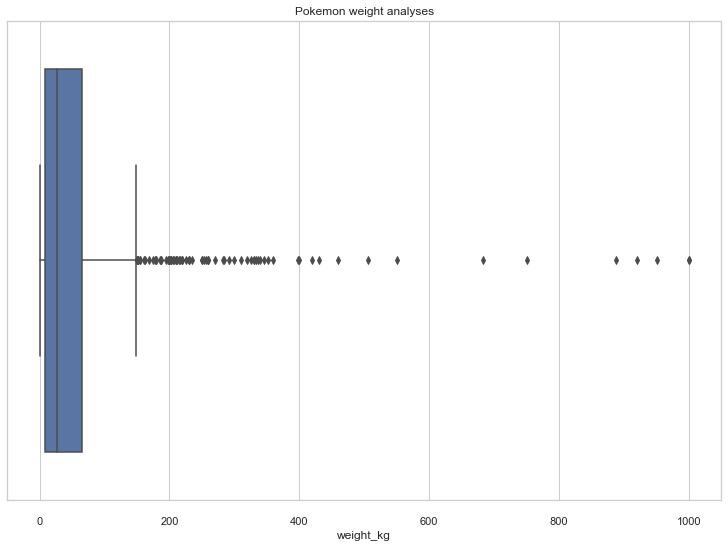

In [15]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data['weight_kg'])
plt.title("Pokemon weight analyses")

In [16]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NA,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NA,19.0,1,0


In [17]:
columns = ['speed','defense','height_m','hp','sp_attack','sp_defense','weight_kg']

In [18]:
consolidate = data.groupby('type1').mean()[columns]

In [19]:
columns

['speed', 'defense', 'height_m', 'hp', 'sp_attack', 'sp_defense', 'weight_kg']

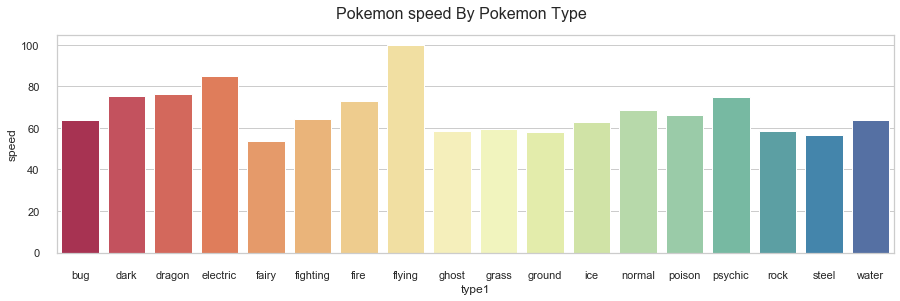

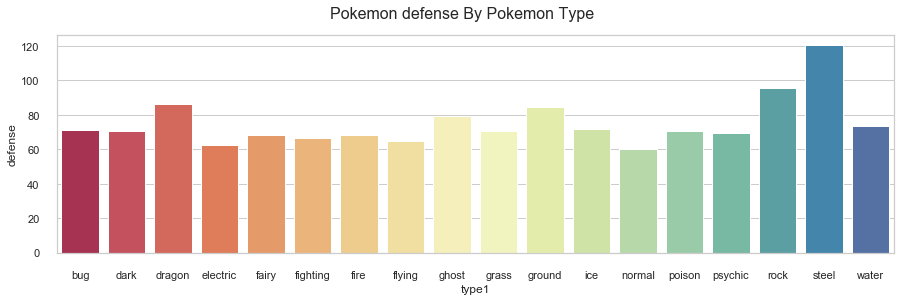

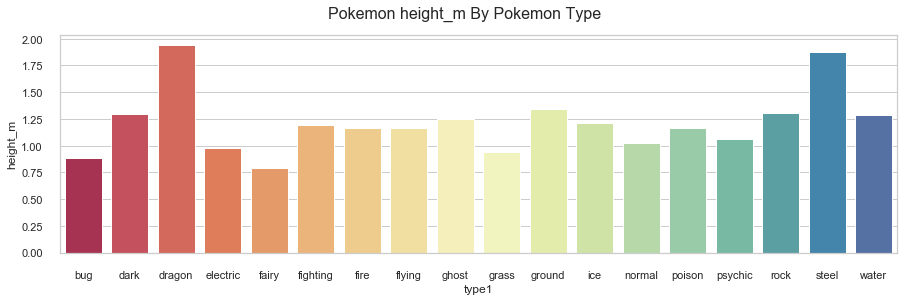

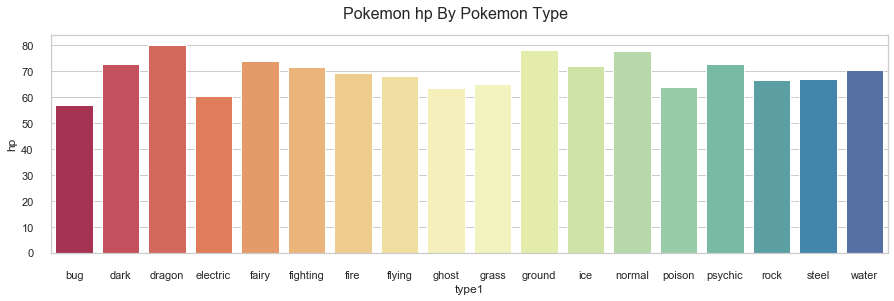

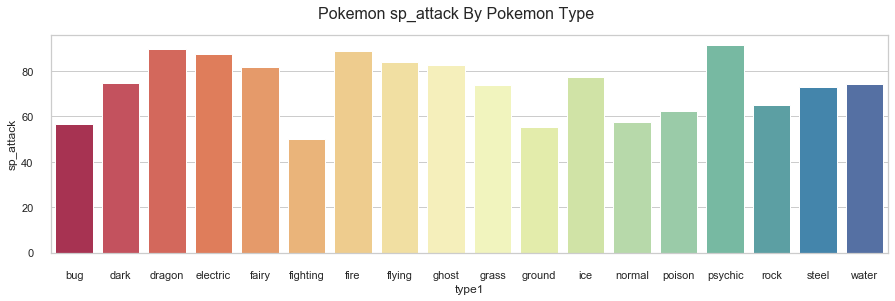

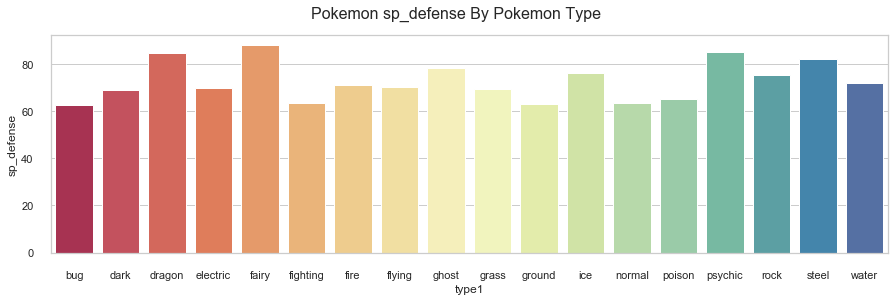

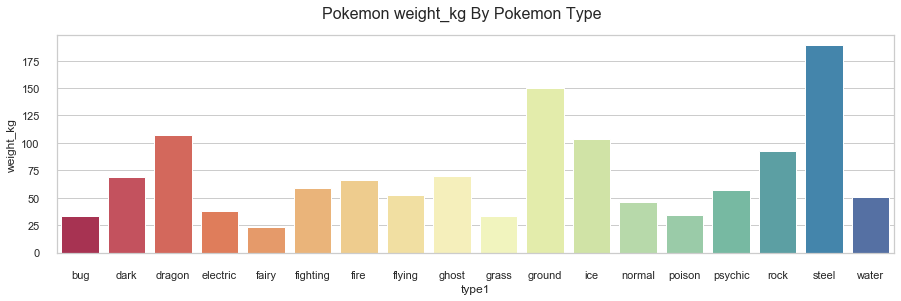

In [20]:
for col in columns:
    plt.figure(figsize=(15,4))

    sns.barplot(x=consolidate.index,y=consolidate.loc[:,col], palette='Spectral')

    sns.barplot(x=consolidate.index,y=consolidate.loc[:,col], palette='Spectral')

    plt.suptitle('Pokemon '+col+' By Pokemon Type', fontsize=16)

In [21]:
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NA,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NA,19.0,1,0


In [22]:
consolidate_by_gen = data.groupby('generation').mean()[columns]

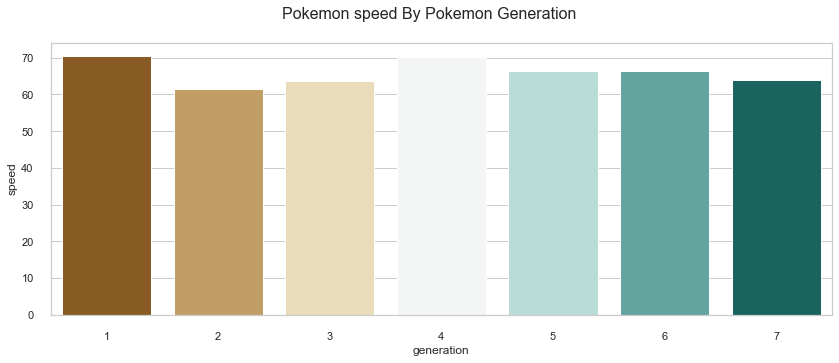

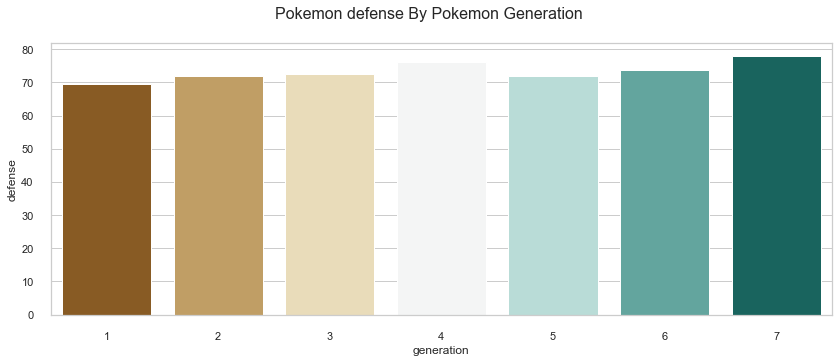

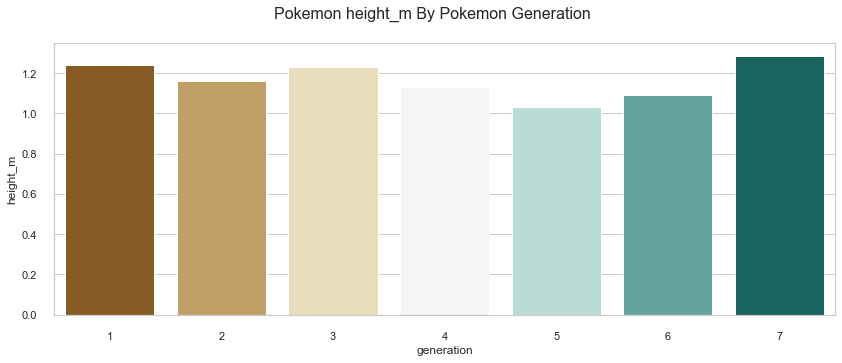

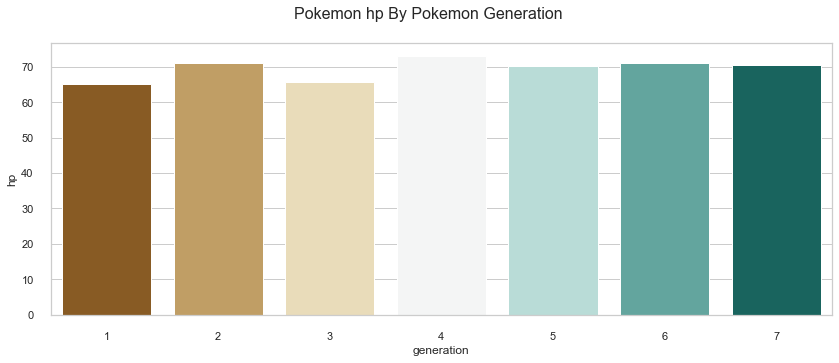

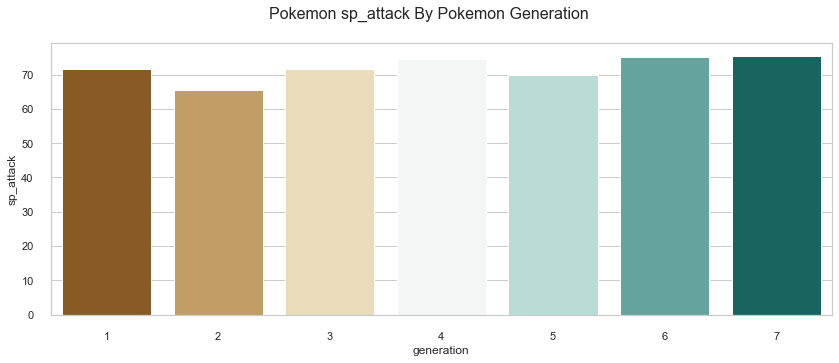

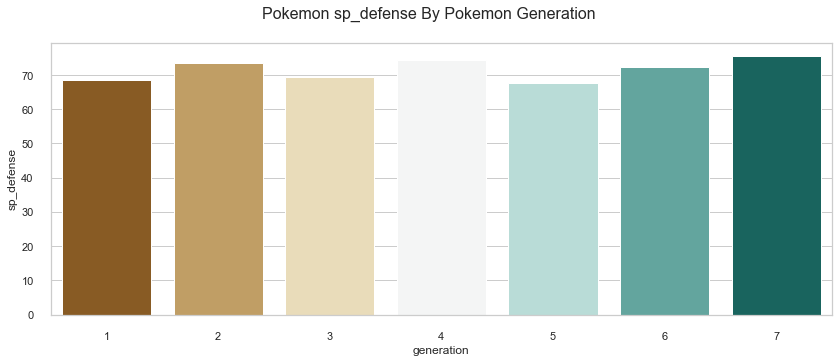

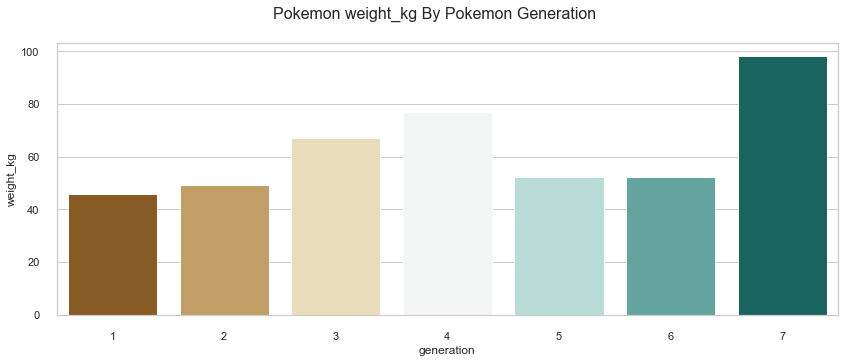

In [23]:

for col in columns:
    plt.figure(figsize=(14,5))
    sns.barplot(x=consolidate_by_gen.index,y=consolidate_by_gen.loc[:,col], palette=sns.color_palette("BrBG", 7))

    sns.barplot(x=consolidate_by_gen.index,y=consolidate_by_gen.loc[:,col], palette=sns.color_palette("BrBG", 7))

    plt.suptitle('Pokemon '+col+' By Pokemon Generation', fontsize=16)


In [24]:
groupbyTyep1 = data.groupby('type1').mean().iloc[:,:18]
groupbyTyep1

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
type1,,,,,,,,,,,,,,,,,,
bug,0.826389,0.979167,0.937500,1.138889,0.916667,0.458333,2.194444,2.083333,1.013889,0.420139,0.562500,1.208333,0.930556,0.930556,1.159722,2.291667,0.972222,1.020833
dark,1.724138,0.534483,1.103448,1.103448,2.275862,1.965517,1.034483,1.034483,0.551724,0.775862,0.965517,1.206897,0.931034,0.913793,0.000000,1.241379,1.000000,1.000000
dragon,0.944444,1.037037,2.000000,0.490741,2.111111,0.925926,0.509259,1.055556,1.074074,0.527778,0.925926,2.518519,1.000000,0.925926,1.037037,1.111111,1.000000,0.592593
electric,0.868421,1.000000,0.894737,0.539474,0.947368,1.065789,1.105263,0.473684,0.973684,0.907895,2.052632,1.026316,0.921053,0.934211,0.947368,1.026316,0.500000,1.000000
fairy,0.472222,0.500000,0.000000,1.111111,1.000000,0.472222,1.000000,1.000000,1.000000,0.944444,0.888889,1.111111,1.000000,2.000000,1.000000,1.111111,2.000000,1.000000
fighting,0.535714,0.526786,0.982143,1.035714,2.035714,1.053571,1.071429,1.964286,1.053571,0.964286,1.000000,1.000000,0.982143,0.964286,1.821429,0.526786,1.017857,1.000000
fire,0.455000,0.950000,1.010000,1.090000,0.575000,1.030000,0.495000,1.100000,0.970000,0.500000,1.840000,0.580000,0.980000,0.950000,1.080000,2.060000,0.500000,2.080000
flying,0.500000,1.000000,1.666667,1.333333,1.666667,0.500000,0.666667,1.000000,1.000000,0.333333,0.000000,3.333333,1.000000,1.000000,1.000000,2.000000,1.000000,0.666667
ghost,0.527778,1.925926,1.000000,0.888889,0.962963,0.000000,1.111111,1.185185,1.962963,0.814815,1.055556,1.314815,0.000000,0.564815,1.074074,1.148148,0.981481,1.074074


In [25]:
pokemon = data[:]

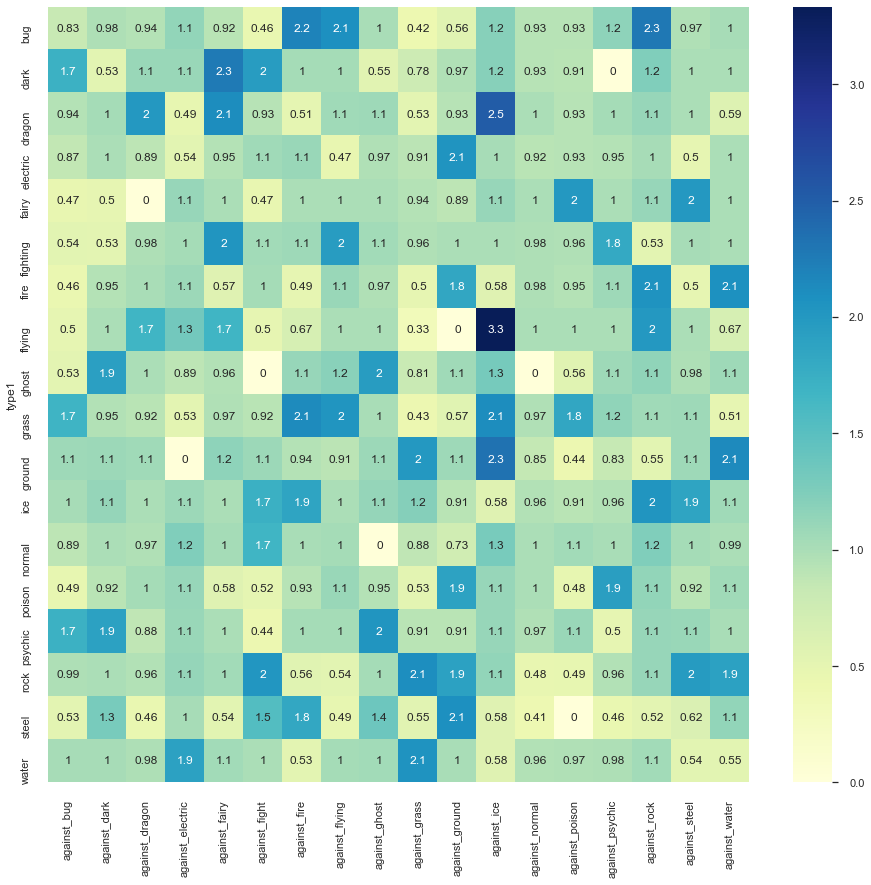

In [26]:
data = groupbyTyep1
fig, ax = plt.subplots()
fig.set_size_inches(15.7, 14.27)
corr = data
ax = sns.heatmap(data, annot=True,cmap="YlGnBu")

In [27]:
pokemon.iloc[753,23] =30

In [28]:
pokemon[pokemon.index == 773]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30,Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,-1.0,774,100,60,120,rock,flying,40.0,7,0


In [29]:
pokemon['capture_rate'] = pokemon['capture_rate'].astype('int32')

In [30]:
np.dtype(pokemon['capture_rate'])

dtype('int32')

In [31]:
pokemon[['generation','name','capture_rate']].groupby('generation').mean().head(10)

,capture_rate
generation,
1,101.593985
2,91.900000
3,113.355556
4,78.859813
5,103.102564
6,101.774648
7,84.443038


In [32]:
pokemon[['type1','name','capture_rate']].groupby('type1').mean().head(10)

,capture_rate
type1,
bug,119.833333
dark,84.482759
dragon,37.333333
electric,107.815789
fairy,116.944444
fighting,103.750000
fire,70.000000
flying,79.333333
ghost,93.814815


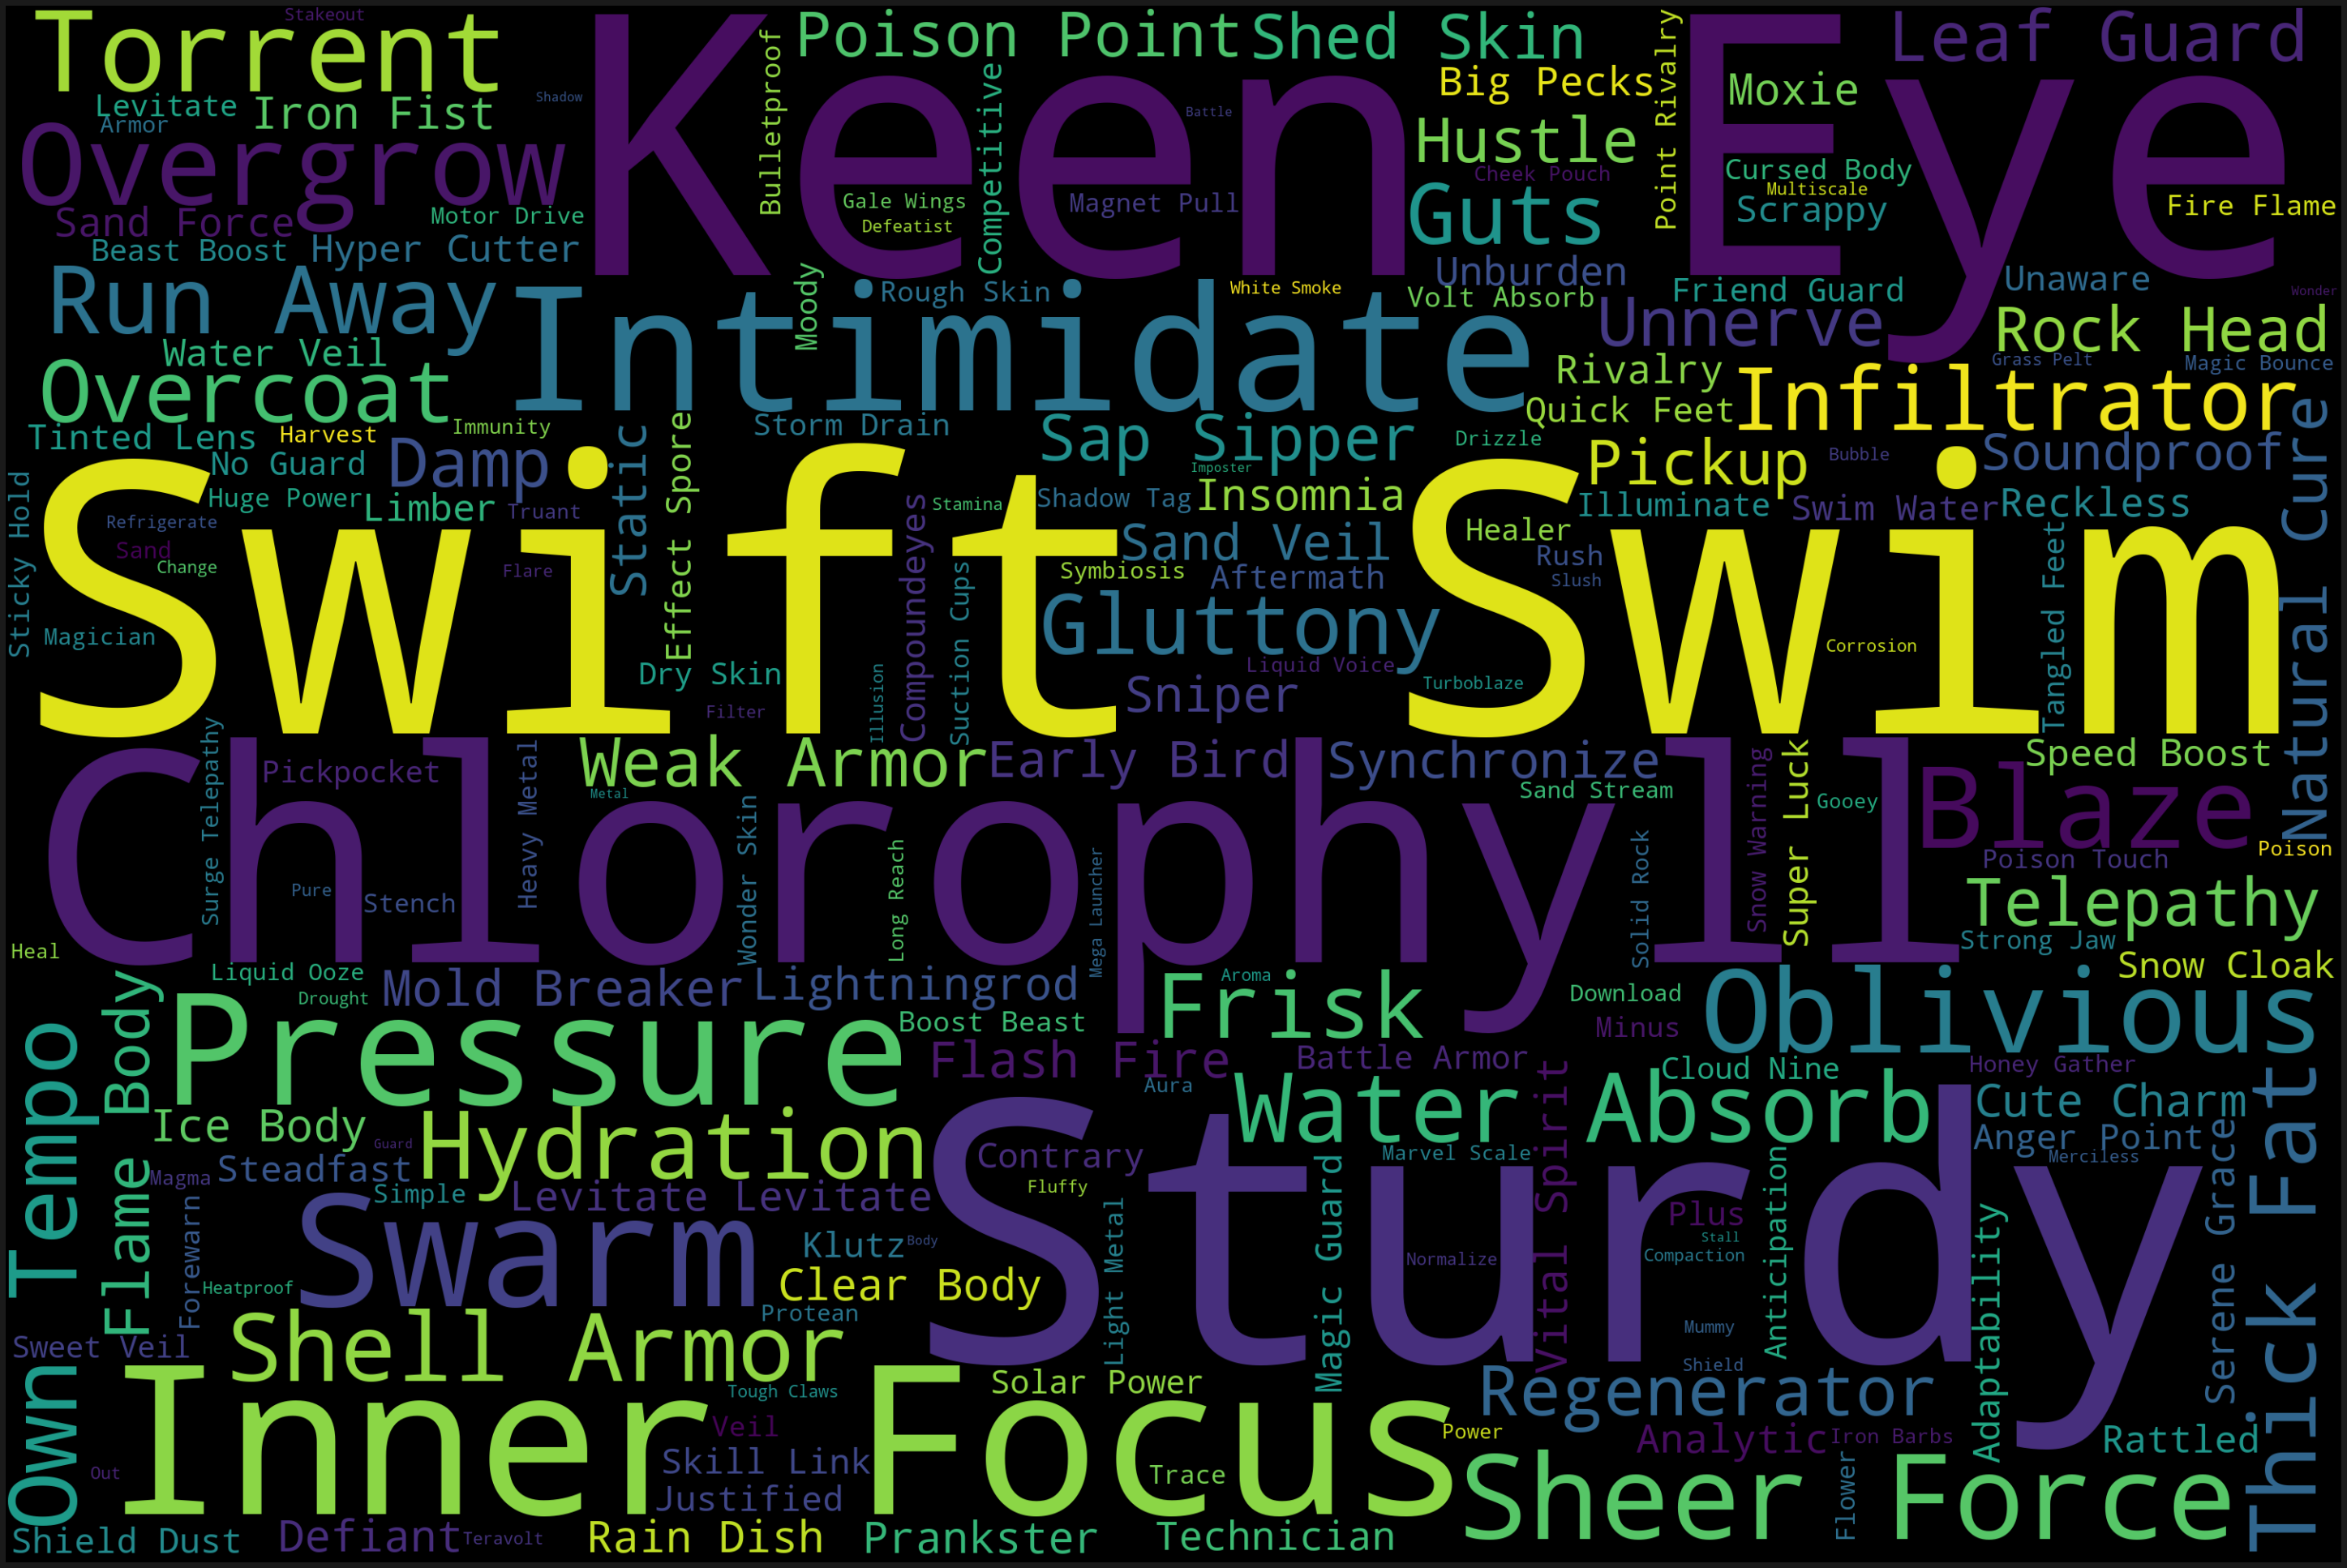

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = pokemon.abilities.str.findall(r'\'([A-Za-z ]*)\'')
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [34]:
consolidate_type2_leg = pokemon[['type2','is_legendary']][(pokemon['is_legendary'] == 1) & (pokemon['type2'] != 'NA')].groupby('type2').count().sort_values(by='type2',ascending = False)
consolidate_type2_leg

,is_legendary
type2,
water,1
steel,4
psychic,4
poison,1
ice,1
ground,1
grass,2
ghost,1
flying,10


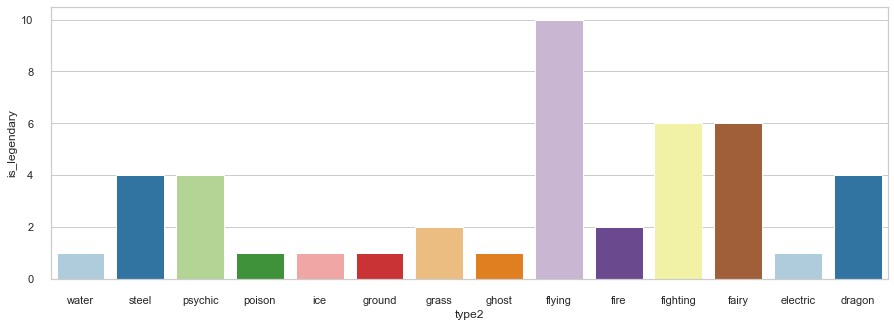

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.barplot(x=consolidate_type2_leg.index,y=consolidate_type2_leg['is_legendary'], palette=sns.color_palette("Paired"))


In [36]:
consolidate_type1_leg = pokemon[['type1','is_legendary']][(pokemon['is_legendary'] == 1)].groupby('type1').count().sort_values(by='type1',ascending = False)

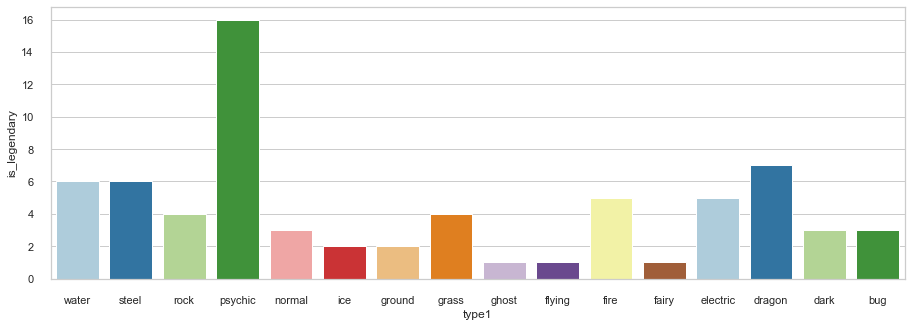

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(15.3, 5)
sns.barplot(x=consolidate_type1_leg.index,y=consolidate_type1_leg['is_legendary'], palette=sns.color_palette("Paired"))


In [38]:
pokemon[['percentage_male','name']].groupby('percentage_male',).count()

,name
percentage_male,
-1.0,97
0.0,27
11.2,2
24.6,22
50.0,484
75.4,19
88.1,111
100.0,19


In [39]:
pokemon[['name','base_total']].sort_values('base_total' , ascending=False)[:10]

,name,base_total
149,Mewtwo,780
383,Rayquaza,780
382,Groudon,770
381,Kyogre,770
492,Arceus,720
717,Zygarde,708
380,Latios,700
247,Tyranitar,700
444,Garchomp,700
379,Latias,700


In [40]:
pokemon['No_of_abilities'] = pokemon['abilities'].transform(lambda x:len(x.split(',')))

In [41]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,No_of_abilities
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0,2
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0,2
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0,2
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NA,8.5,1,0,2
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NA,19.0,1,0,2


In [42]:
#converted categor
category = ['classfication','type1','type2']

for i in category:
    pokemon[i] = pokemon[i].astype('category')
    pokemon[i] = pokemon[i].cat.codes

In [43]:
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,No_of_abilities
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,441,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,9,14,6.9,1,0,2
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,441,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,9,14,13.0,1,0,2
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,441,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,9,14,100.0,1,0,2
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,295,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,6,0,8.5,1,0,2
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,183,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,6,0,19.0,1,0,2


In [44]:
pokemon.drop(['abilities','japanese_name','name'],axis=1,inplace = True)

# Splitting data

In [45]:
X = pokemon.drop(['is_legendary'],axis = 1)
y = pokemon['is_legendary']


In [46]:
# splitting data into test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Machine learning

In [47]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_lr_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_lr_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_lr_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_lr_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_lr_pred)))

[[140   1]
 [  3  13]]
Precision score: 0.9286
Recall score: 0.8125
Accuracy score: 0.9745
F1 score: 0.8667


C:\Users\palas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_nb_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_nb_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_nb_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_nb_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_nb_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_nb_pred)))

[[136   5]
 [  0  16]]
Precision score: 0.7619
Recall score: 1.0000
Accuracy score: 0.9682
F1 score: 0.8649


In [49]:

# Train the classifier
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

# Predict 
y_svm_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_svm_pred))

print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_svm_pred)))


[[141   0]
 [ 16   0]]
Accuracy score: 0.8981


In [50]:
rfm = RandomForestClassifier(n_estimators= 70,oob_score=True,n_jobs=-1,random_state = 101,max_features=None,min_samples_leaf=30)
rfm.fit(X_train,y_train)
y_rfm_pred = rfm.predict(X_test)


print(confusion_matrix(y_test, y_rfm_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_rfm_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_rfm_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_rfm_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_rfm_pred)))

[[141   0]
 [  1  15]]
Precision score: 1.0000
Recall score: 0.9375
Accuracy score: 0.9936
F1 score: 0.9677


In [51]:
sgd = SGDClassifier(random_state = 0)
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher = GridSearchCV(sgd, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))


y_sgd_pred = searcher.predict(X_test)

print(confusion_matrix(y_test, y_sgd_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_sgd_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_sgd_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_sgd_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_sgd_pred)))




Best CV params {'alpha': 0.01, 'loss': 'log', 'penalty': 'l1'}
Best CV accuracy 0.987173579109063
Test accuracy of best grid search hypers: 0.9617834394904459
[[136   5]
 [  1  15]]
Precision score: 0.7500
Recall score: 0.9375
Accuracy score: 0.9618
F1 score: 0.8333


In [52]:
dtc_entropy =DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dtc_entropy.fit(X_train, y_train)
y_dtc_entropy_pred = dtc_entropy.predict(X_test)


dtc_gini =DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dtc_gini.fit(X_train, y_train)
y_dtc_gini_pred = dtc_gini.predict(X_test)


print('Criterion : ENTROPY')
print(confusion_matrix(y_test, y_dtc_entropy_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_dtc_entropy_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_dtc_entropy_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_dtc_entropy_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_dtc_entropy_pred)))



print('\n\nCriterion : GINI')
print(confusion_matrix(y_test, y_dtc_gini_pred))
print('Precision score: {:.4f}'.format(precision_score(y_test,y_dtc_gini_pred)))
print('Recall score: {:.4f}'.format(recall_score(y_test,y_dtc_gini_pred)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test,y_dtc_gini_pred)))
print('F1 score: {:.4f}'.format(f1_score(y_test,y_dtc_gini_pred)))




Criterion : ENTROPY
[[141   0]
 [  0  16]]
Precision score: 1.0000
Recall score: 1.0000
Accuracy score: 1.0000
F1 score: 1.0000


Criterion : GINI
[[141   0]
 [  0  16]]
Precision score: 1.0000
Recall score: 1.0000
Accuracy score: 1.0000
F1 score: 1.0000
